In [1]:
# 주택 가격 예측: 회귀분석
#회귀분석 : 연속적인 값을 예측
# 예) 과거 기상 데이터를 입력하여 내일의 기온을 예측
# 보스턴 주택 가격 데이터셋
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로
# 주택 가격 예측
# 샘플 개수 : 506개(학습용 404개, 검증용 102개)
from keras.datasets import boston_housing
# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:
#학습용 404개, 검증용 102개, 13개의 변수
print(X_train.shape)
print(X_train.shape[1])

(404, 13)
13


In [3]:
X_test.shape

(102, 13)

In [5]:
# 독립 변수 목록
# 1. Per capita crime rate.
# 2. Proportion of residential land zoned for lots over 25,000
# square feet.
# 3. Proportion of non-retail business acres per town.
# 4. Charles River dummy variable (= 1 if tract bounds river;
# 0 otherwise).
# 5. Nitric oxides concentration (parts per 10 million).
# 6. Average number of rooms per dwelling.
# 7. Proportion of owner-occupied units built prior to 1940.
# 8. Weighted distances to five Boston employment centres.
# 9. Index of accessibility to radial highways.
# 10. Full-value property-tax rate per $10,000.
# 11. Pupil-teacher ratio by town.
# 12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of
# Black people by town.
# 13. % lower status of the population.
# 종속변수 : 주택의 가격(천달러 단위)
#주택가격(10000~50000달러, 1970년대 중반 가격)
y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

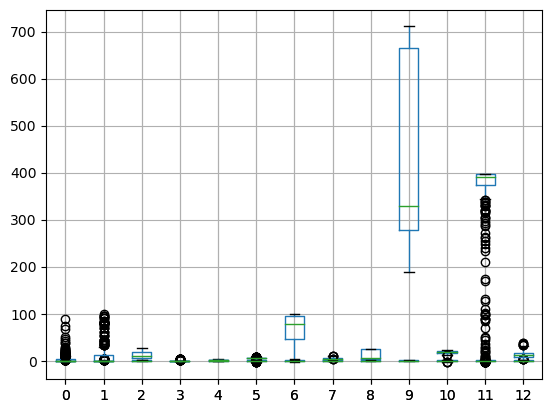

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(X_train).boxplot()
plt.show()

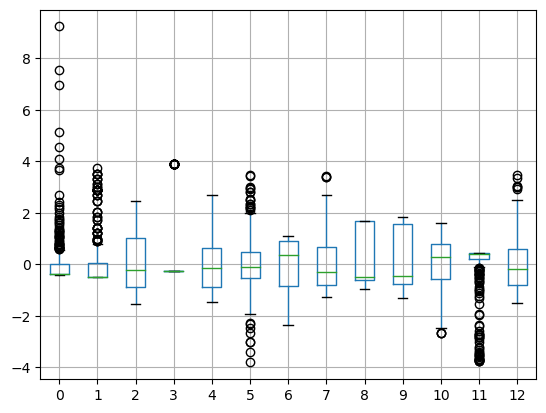

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
pd.DataFrame(X_train_scaled).boxplot()
plt.show()

In [11]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수
# input data -> {activation function} -> output data
# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수, ReLU 함수
# 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서
# 최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음
from keras import models, layers
#64개의 노드를 가진 은닉층 2개의 신경망
def build_model():
    model = models.Sequential()
    #relu
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    #출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우
    # 활성화 함수가 없는 선형층을 사용함)
    model.add(layers.Dense(1))
    #mse 손실 함수를 사용하여 컴파일
    #mse : 평균 제곱 오차(mean squared error) -
    # 예측값과 실제값의 거리의 제곱
    #mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값
    #metrics 평가지표, 검증용 데이터셋으로 평가하는 기준
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
model = build_model()

In [12]:
# 모델 학습
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 576.0547 - mae: 22.1885
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 527.6025 - mae: 21.1384
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 483.6258 - mae: 20.1161
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 435.1390 - mae: 18.9403
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 383.2102 - mae: 17.6221
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 329.9573 - mae: 16.1501
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 277.8182 - mae: 14.5396
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 226.8317 - mae: 12.7809
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 181.9050 - mae: 11.1223
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 144.4827 - mae: 9.5738
Epoch 11/100
7/7 [==============================]

In [13]:
# 검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(mse)
print(mae) # 2615 달러 정도 차이가 남

4/4 [==============================] - 0s 3ms/step - loss: 21.0487 - mae: 2.8247
21.048681259155273
2.824728012084961


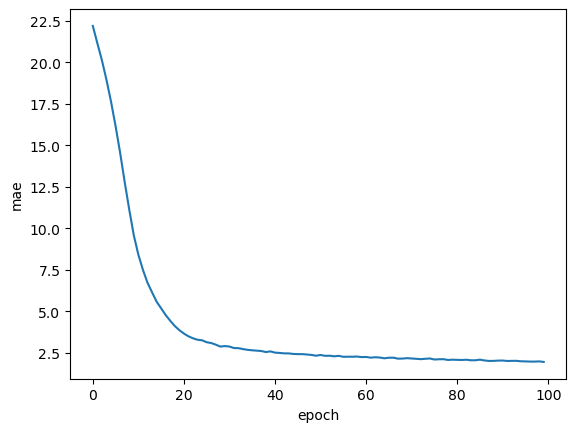

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("epoch")
plt.show()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [17]:
# https://github.com/gaussian37/netron
from keras.models import load_model

model.save('mymodel.h5')
del model
model = load_model('mymodel.h5')